In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from colorama import init
from colorama import Fore

In [2]:
class GridWorld:
    ## Initialise starting data
    def __init__(self):
        # Set information about the gridworld
        self.height = 20
        self.width = 20
        self.grid = np.zeros(( self.height, self.width)) - 1
        self.maze = np.zeros(( self.height, self.width))

        # Set random start location for the agent
        self.current_location = self.get_random_cell()
        self.maze[self.current_location[0],self.current_location[1]] = 1

        #Set walls for maze
        self.walls = self.get_walls()

        # Set locations for the bomb and the gold
        self.bomb_location = self.get_random_cell()
        while self.bomb_location in self.walls:
            self.bomb_location = self.get_random_cell()

        self.gold_location = self.get_random_cell()
        while self.gold_location == self.bomb_location or self.gold_location in self.walls:
            self.gold_location = self.get_random_cell()
        self.terminal_states = [ self.bomb_location, self.gold_location]

        # Set grid rewards for special cells
        self.grid[self.bomb_location[0], self.bomb_location[1]] = -100
        self.grid[self.gold_location[0], self.gold_location[1]] = 100

        # Set available actions
        self.actions = ['UP', 'DOWN', 'LEFT', 'RIGHT']

        self.P = self.build_transition_probabilities()
        self.state_space = [(i, j) for i in range(self.height) for j in range(self.width) if (i, j) not in self.walls]

    def build_transition_probabilities(self):
        P = {}
        for i in range(self.height):
            for j in range(self.width):
                if (i, j) not in self.walls:
                    for action in self.actions:
                        if action == 'UP':
                            new_state = (max(i-1, 0), j)
                        elif action == 'DOWN':
                            new_state = (min(i+1, self.height-1), j)
                        elif action == 'LEFT':
                            new_state = (i, max(j-1, 0))
                        elif action == 'RIGHT':
                            new_state = (i, min(j+1, self.width-1))
                        
                        if new_state in self.walls:
                            new_state = (i, j)  # Stay in the same place if the new state is a wall
                        reward = self.get_reward(new_state)
                        P[((i, j), action)] = (new_state, reward)
        return P
    

    def get_random_cell(self):
        random_h = int(random.random()*self.height)
        random_w = int(random.random()*self.width)
        if (random_h == 0):
            random_h += 1
        if (random_h == self.height-1):
            random_h -= 1
        if (random_w == 0):
            random_w += 1
        if (random_w == self.width-1):
            random_w -= 1
        return (random_h, random_w)
    
    def surrounding_cells(self, rand_wall):
        s_cells = 0
        if (self.maze[rand_wall[0]-1,rand_wall[1]] == 1):
            s_cells += 1
        if (self.maze[rand_wall[0]+1,rand_wall[1]] == 1):
            s_cells += 1
        if (self.maze[rand_wall[0],rand_wall[1]-1] == 1):
            s_cells +=1
        if (self.maze[rand_wall[0],rand_wall[1]+1] == 1):
            s_cells += 1

        return s_cells
    
    def get_walls(self):
        self.walls = []
        self.walls.append((self.current_location[0]-1,self.current_location[1]))
        self.walls.append((self.current_location[0],self.current_location[1]-1))
        self.walls.append((self.current_location[0],self.current_location[1]+1))
        self.walls.append((self.current_location[0]+1,self.current_location[1]))
        while (self.walls):
            # Pick a random wall
            rand_wall = self.walls[int(random.random()*len(self.walls))-1]

            # Check if it is a left wall
            if (rand_wall[1] != 0):
                if (self.maze[rand_wall[0],rand_wall[1]-1] == 0 and self.maze[rand_wall[0],rand_wall[1]+1] == 1):
                    # Find the number of surrounding cells
                    s_cells = self.surrounding_cells(rand_wall)

                    if (s_cells < 2):
                        # Denote the new path
                        self.maze[rand_wall[0],rand_wall[1]] = 1

                        # Mark the new walls
                        # Upper cell
                        if (rand_wall[0] != 0):
                            if (self.maze[rand_wall[0]-1,rand_wall[1]] != 1):
                                self.maze[rand_wall[0]-1,rand_wall[1]] = 8
                            if ([rand_wall[0]-1, rand_wall[1]] not in self.walls):
                                self.walls.append([rand_wall[0]-1, rand_wall[1]])


                        # Bottom cell
                        if (rand_wall[0] != self.height-1):
                            if (self.maze[rand_wall[0]+1,rand_wall[1]] != 1):
                                self.maze[rand_wall[0]+1,rand_wall[1]] = 8
                            if ([rand_wall[0]+1, rand_wall[1]] not in self.walls):
                                self.walls.append([rand_wall[0]+1, rand_wall[1]])

                        # Leftmost cell
                        if (rand_wall[1] != 0):	
                            if (self.maze[rand_wall[0],rand_wall[1]-1] != 1):
                                self.maze[rand_wall[0],rand_wall[1]-1] = 8
                            if ([rand_wall[0], rand_wall[1]-1] not in self.walls):
                                self.walls.append([rand_wall[0], rand_wall[1]-1])
                    

                    # Delete wall
                    for wall in self.walls:
                        if (wall[0] == rand_wall[0] and wall[1] == rand_wall[1]):
                            self.walls.remove(wall)

                    continue

            # Check if it is an upper wall
            if (rand_wall[0] != 0):
                if (self.maze[rand_wall[0]-1,rand_wall[1]] == 0 and self.maze[rand_wall[0]+1,rand_wall[1]] == 1):

                    s_cells = self.surrounding_cells(rand_wall)
                    if (s_cells < 2):
                        # Denote the new path
                        self.maze[rand_wall[0],rand_wall[1]] = 1

                        # Mark the new walls
                        # Upper cell
                        if (rand_wall[0] != 0):
                            if (self.maze[rand_wall[0]-1,rand_wall[1]] != 1):
                                self.maze[rand_wall[0]-1,rand_wall[1]] = 8
                            if ([rand_wall[0]-1, rand_wall[1]] not in self.walls):
                                self.walls.append([rand_wall[0]-1, rand_wall[1]])

                        # Leftmost cell
                        if (rand_wall[1] != 0):
                            if (self.maze[rand_wall[0],rand_wall[1]-1] != 1):
                                self.maze[rand_wall[0],rand_wall[1]-1] = 8
                            if ([rand_wall[0], rand_wall[1]-1] not in self.walls):
                                self.walls.append([rand_wall[0], rand_wall[1]-1])

                        # Rightmost cell
                        if (rand_wall[1] != self.width-1):
                            if (self.maze[rand_wall[0],rand_wall[1]+1] != 1):
                                self.maze[rand_wall[0],rand_wall[1]+1] = 8
                            if ([rand_wall[0], rand_wall[1]+1] not in self.walls):
                                self.walls.append([rand_wall[0], rand_wall[1]+1])

                    # Delete wall
                    for wall in self.walls:
                        if (wall[0] == rand_wall[0] and wall[1] == rand_wall[1]):
                            self.walls.remove(wall)

                    continue

            # Check the bottom wall
            if (rand_wall[0] != self.height-1):
                if (self.maze[rand_wall[0]+1,rand_wall[1]] == 0 and self.maze[rand_wall[0]-1,rand_wall[1]] == 1):

                    s_cells = self.surrounding_cells(rand_wall)
                    if (s_cells < 2):
                        # Denote the new path
                        self.maze[rand_wall[0],rand_wall[1]] = 1

                        # Mark the new walls
                        if (rand_wall[0] != self.height-1):
                            if (self.maze[rand_wall[0]+1,rand_wall[1]] != 1):
                                self.maze[rand_wall[0]+1,rand_wall[1]] = 8
                            if ([rand_wall[0]+1, rand_wall[1]] not in self.walls):
                                self.walls.append([rand_wall[0]+1, rand_wall[1]])
                        if (rand_wall[1] != 0):
                            if (self.maze[rand_wall[0],rand_wall[1]-1] != 1):
                                self.maze[rand_wall[0],rand_wall[1]-1] = 8
                            if ([rand_wall[0], rand_wall[1]-1] not in self.walls):
                                self.walls.append([rand_wall[0], rand_wall[1]-1])
                        if (rand_wall[1] != self.width-1):
                            if (self.maze[rand_wall[0],rand_wall[1]+1] != 1):
                                self.maze[rand_wall[0],rand_wall[1]+1] = 8
                            if ([rand_wall[0], rand_wall[1]+1] not in self.walls):
                                self.walls.append([rand_wall[0], rand_wall[1]+1])

                    # Delete wall
                    for wall in self.walls:
                        if (wall[0] == rand_wall[0] and wall[1] == rand_wall[1]):
                            self.walls.remove(wall)


                    continue

            # Check the right wall
            if (rand_wall[1] != self.width-1):
                if (self.maze[rand_wall[0],rand_wall[1]+1] == 0 and self.maze[rand_wall[0],rand_wall[1]-1] == 1):

                    s_cells = self.surrounding_cells(rand_wall)
                    if (s_cells < 2):
                        # Denote the new path
                        self.maze[rand_wall[0],rand_wall[1]] = 1

                        # Mark the new walls
                        if (rand_wall[1] != self.width-1):
                            if (self.maze[rand_wall[0],rand_wall[1]+1] != 1):
                                self.maze[rand_wall[0],rand_wall[1]+1] = 8
                            if ([rand_wall[0], rand_wall[1]+1] not in self.walls):
                                self.walls.append([rand_wall[0], rand_wall[1]+1])
                        if (rand_wall[0] != self.height-1):
                            if (self.maze[rand_wall[0]+1,rand_wall[1]] != 1):
                                self.maze[rand_wall[0]+1,rand_wall[1]] = 8
                            if ([rand_wall[0]+1, rand_wall[1]] not in self.walls):
                                self.walls.append([rand_wall[0]+1, rand_wall[1]])
                        if (rand_wall[0] != 0):	
                            if (self.maze[rand_wall[0]-1,rand_wall[1]] != 1):
                                self.maze[rand_wall[0]-1,rand_wall[1]] = 8
                            if ([rand_wall[0]-1, rand_wall[1]] not in self.walls):
                                self.walls.append([rand_wall[0]-1, rand_wall[1]])

                    # Delete wall
                    for wall in self.walls:
                        if (wall[0] == rand_wall[0] and wall[1] == rand_wall[1]):
                            self.walls.remove(wall)

                    continue

            # Delete the wall from the list anyway
            for wall in self.walls:
                if (wall[0] == rand_wall[0] and wall[1] == rand_wall[1]):
                    self.walls.remove(wall)

        # Mark the remaining unvisited cells as walls
        for i in range(0, self.height):
            for j in range(0, self.width):
                if (self.maze[i,j] == 0):
                    self.maze[i,j] = 8
        for i in range(0, self.width):
            if (self.maze[1,i] == 1):
                self.maze[0,i] = 1
                break

        for i in range(self.width-1, 0, -1):
            if (self.maze[self.height-2,i] == 1):
                self.maze[self.height-1,i] = 1
                break

        final_walls = []
        for i in range(0, self.height):
            for j in range(0, self.width):
                if (self.maze[i,j] == 8):
                    final_walls.append((i,j))
        
        return final_walls


    ## Put methods here:
    def get_available_actions(self):
        """Returns possible actions"""
        return self.actions

    def agent_on_map(self):
        """Prints out current location of the agent on the grid (used for debugging)"""
        grid = np.zeros(( self.height, self.width), dtype=int)
        grid[ self.current_location[0], self.current_location[1]] = 1
        for wall in self.walls:
            grid[wall[0],wall[1]]=8
        return grid
    
    def printMaze(self):
        for i in range(0, self.height):
            for j in range(0, self.width):
                if (i == self.current_location[0] and j==self.current_location[1]):
                    print(Fore.BLUE + str(self.maze[i,j]), end=" ")
                elif (i == self.gold_location[0] and j==self.gold_location[1]):
                    print(Fore.MAGENTA + str(self.maze[i,j]), end=" ")
                elif (i == self.bomb_location[0] and j==self.bomb_location[1]):
                    print(Fore.YELLOW + str(self.maze[i,j]), end=" ")
                elif (self.maze[i,j] == 0):
                    print(Fore.WHITE + str(self.maze[i,j]), end=" ")
                elif (self.maze[i,j] == 1):
                    print(Fore.GREEN + str(self.maze[i,j]), end=" ")
                else:
                    print(Fore.RED + str(self.maze[i,j]), end=" ")
            print('\n')

    def get_reward(self, new_location):
        """Returns the reward for an input position"""
        return self.grid[ new_location[0], new_location[1]]

    def make_step(self, action):
        """Moves the agent in the specified direction. If agent is at a border, agent stays still
        but takes negative reward. Function returns the reward for the move."""
        # Store previous location
        last_location = self.current_location
        new_location = last_location

        # Determine new location based on action
        if action == 'UP' and last_location[0] > 0:
            new_location = (last_location[0] - 1, last_location[1])
        elif action == 'DOWN' and last_location[0] < self.height - 1:
            new_location = (last_location[0] + 1, last_location[1])
        elif action == 'LEFT' and last_location[1] > 0:
            new_location = (last_location[0], last_location[1] - 1)
        elif action == 'RIGHT' and last_location[1] < self.width - 1:
            new_location = (last_location[0], last_location[1] + 1)

        # Check for walls
        if self.grid[new_location[0], new_location[1]] == -999:
            new_location = last_location

        # Update agent's location
        self.current_location = new_location
        reward = self.get_reward(self.current_location)

        return reward

    def check_state(self, state=0):
        if state == 0:
            state = self.current_location

        if state in self.terminal_states:
            return True
        return False
    

In [3]:
class RandomAgent():
    # Choose a random action
    def choose_action(self, env):
        """Returns a random choice of the available actions"""
        return np.random.choice(env.actions)
    
class ValueAgent:
    def __init__(self, v):
        self.v = v

    def choose_action(self, env):
        # Choose the action with the highest value
        current_state = env.current_location
        best_action = None
        best_value = float('-inf')
        for action in env.actions:
            result = env.P.get((current_state, action))
            if result is not None:
                (n_i, n_j), reward = result
                expected_value = self.v[(n_i, n_j)]
                if expected_value > best_value:
                    best_value = expected_value
                    best_action = action
        return best_action
    

In [4]:
def play(environment, agent, trials=500, max_steps_per_episode=1000, learn=False):
    """The play function runs iterations and updates Q-values if desired."""
    reward_per_episode = []

    for trial in range(trials):
        cumulative_reward = 0
        step = 0
        game_over = False
        while step < max_steps_per_episode and game_over != True:
            old_state = environment.current_location
            action = agent.choose_action(environment)
            reward = environment.make_step(action)
            new_state = environment.current_location

            if learn == True:
                agent.learn(old_state, reward, new_state, action)

            cumulative_reward += reward
            step += 1

            if environment.check_state():
                environment.__init__()
                game_over = True

        reward_per_episode.append(cumulative_reward)

    return reward_per_episode

In [5]:
def iterate_values(env, v, gamma, theta, p_stoch):
    converged = False
    k = 0
    sp = p_stoch
    p = {'UP': [sp + (1 - sp) / 4, (1 - sp) / 4, (1 - sp) / 4, (1 - sp) / 4],
         'DOWN': [(1 - sp) / 4, sp + (1 - sp) / 4, (1 - sp) / 4, (1 - sp) / 4],
         'LEFT': [(1 - sp) / 4, (1 - sp) / 4, sp + (1 - sp) / 4, (1 - sp) / 4],
         'RIGHT': [(1 - sp) / 4, (1 - sp) / 4, (1 - sp) / 4, sp + (1 - sp) / 4]}
    
    
    while not converged:
        DELTA = 0
        for i in range(0, env.height):
            for j in range(0, env.width):
                k += 1
                if env.check_state((i,j)) or (i,j) in env.walls:
                    v[i,j] = 0                
                else:
                    old_v = v[i,j]
                    new_v = []
                    for action in env.actions:
                        new_v_p = []
                        for idx, action_p in enumerate(env.actions):
                            ((n_i, n_j), reward) = env.P.get(((i,j), action_p))
                            new_v_p.append(p.get(action)[idx] * (reward + (gamma * v[n_i, n_j])))
                        new_v.append(sum(new_v_p))
                    v[i,j] = max(new_v)
                    DELTA = max(DELTA, np.abs(old_v - v[i,j]))
                    converged = True if DELTA < theta else False

    
    print(k, 'iterations of state space')
    return v

In [6]:
def print_v(v, grid):

    cmap = plt.get_cmap('Greens', 100)
    norm = plt.Normalize(v.min(), v.max())
    rgba = cmap(norm(v))
    

    rgba[grid.bomb_location] = 0.0, 0.5, 0.8, 1.0

    rgba[grid.gold_location] = 1.0, 0.5, 0.1, 1.0

    for wall in grid.walls:
        rgba[wall] = 1.0, 0.0, 0.0, 1.0

    fig, ax = plt.subplots(figsize=(25, 25))
    im = ax.imshow(rgba, interpolation='nearest')

    for i in range(v.shape[0]):
        for j in range(v.shape[1]):
            c = 'w'
            if v[i, j] < 4: c = 'k'
            if v[i, j] != 0:
                text = ax.text(j, i, np.round(v[i, j], 2), ha="center", va="center", color=c)

    plt.axis('off')
    # plt.savefig('stochastic_v.jpg', bbox_inches='tight', dpi=200)
    plt.show()
    

In [7]:
class QLearningAgent:
    def __init__(self, alpha, gamma, epsilon):
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.q_table = {}

    def initialize_q_table(self, env):
        for state in env.state_space:
            for action in env.actions:
                self.q_table[(state, action)] = 0.0

    def choose_action(self, env):
        current_state = env.current_location
        if np.random.uniform(0, 1) < self.epsilon:
            return np.random.choice(env.actions)
        else:
            q_values = []
            for action in env.actions:
                if (current_state, action) not in self.q_table:
                    self.q_table[(current_state, action)] = 0.0
                q_values.append(self.q_table[(current_state, action)])
            max_q_value = max(q_values)
            return env.actions[q_values.index(max_q_value)]

    def learn(self, old_state, reward, new_state, action):
        for a in env.actions:
            if (new_state, a) not in self.q_table:
                self.q_table[(new_state, a)] = 0.0
            if (old_state, a) not in self.q_table:
                self.q_table[(old_state, a)] = 0.0
        max_future_q = max([self.q_table[(new_state, a)] for a in env.actions])
        current_q = self.q_table[(old_state, action)]
        self.q_table[(old_state, action)] = current_q + self.alpha * (reward + self.gamma * max_future_q - current_q)


49200 iterations of state space
Current position of the agent = (15, 3)
8.0 1.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 8.0 

8.0 1.0 1.0 1.0 1.0 8.0 1.0 8.0 1.0 8.0 8.0 1.0 8.0 1.0 1.0 1.0 1.0 1.0 1.0 8.0 

8.0 8.0 8.0 8.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 8.0 8.0 8.0 8.0 1.0 8.0 

8.0 1.0 8.0 1.0 1.0 8.0 8.0 1.0 8.0 1.0 8.0 1.0 8.0 8.0 8.0 8.0 1.0 8.0 8.0 8.0 

8.0 1.0 8.0 8.0 1.0 8.0 8.0 8.0 8.0 8.0 8.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 8.0 8.0 

8.0 1.0 8.0 1.0 1.0 8.0 1.0 8.0 1.0 8.0 8.0 8.0 1.0 8.0 1.0 8.0 8.0 1.0 1.0 8.0 

8.0 1.0 8.0 8.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 8.0 8.0 8.0 8.0 8.0 8.0 1.0 8.0 8.0 

8.0 1.0 8.0 1.0 1.0 8.0 1.0 8.0 8.0 8.0 1.0 8.0 8.0 8.0 8.0 8.0 1.0 1.0 1.0 8.0 

8.0 1.0 1.0 1.0 8.0 8.0 8.0 8.0 1.0 8.0 8.0 8.0 1.0 8.0 1.0 8.0 8.0 8.0 8.0 8.0 

8.0 8.0 8.0 1.0 8.0 1.0 8.0 8.0 1.0 1.0 8.0 8.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 8.0 

8.0 1.0 1.0 1.0 1.0 1.0 1.0 8.0 8.0 1.0 1.0 1.0 1.0 8.0 1.0 8.0 8.0 1.0 8.0 8.0 

8.0 8.0 8.0 1.0 8.0 8.0 1.

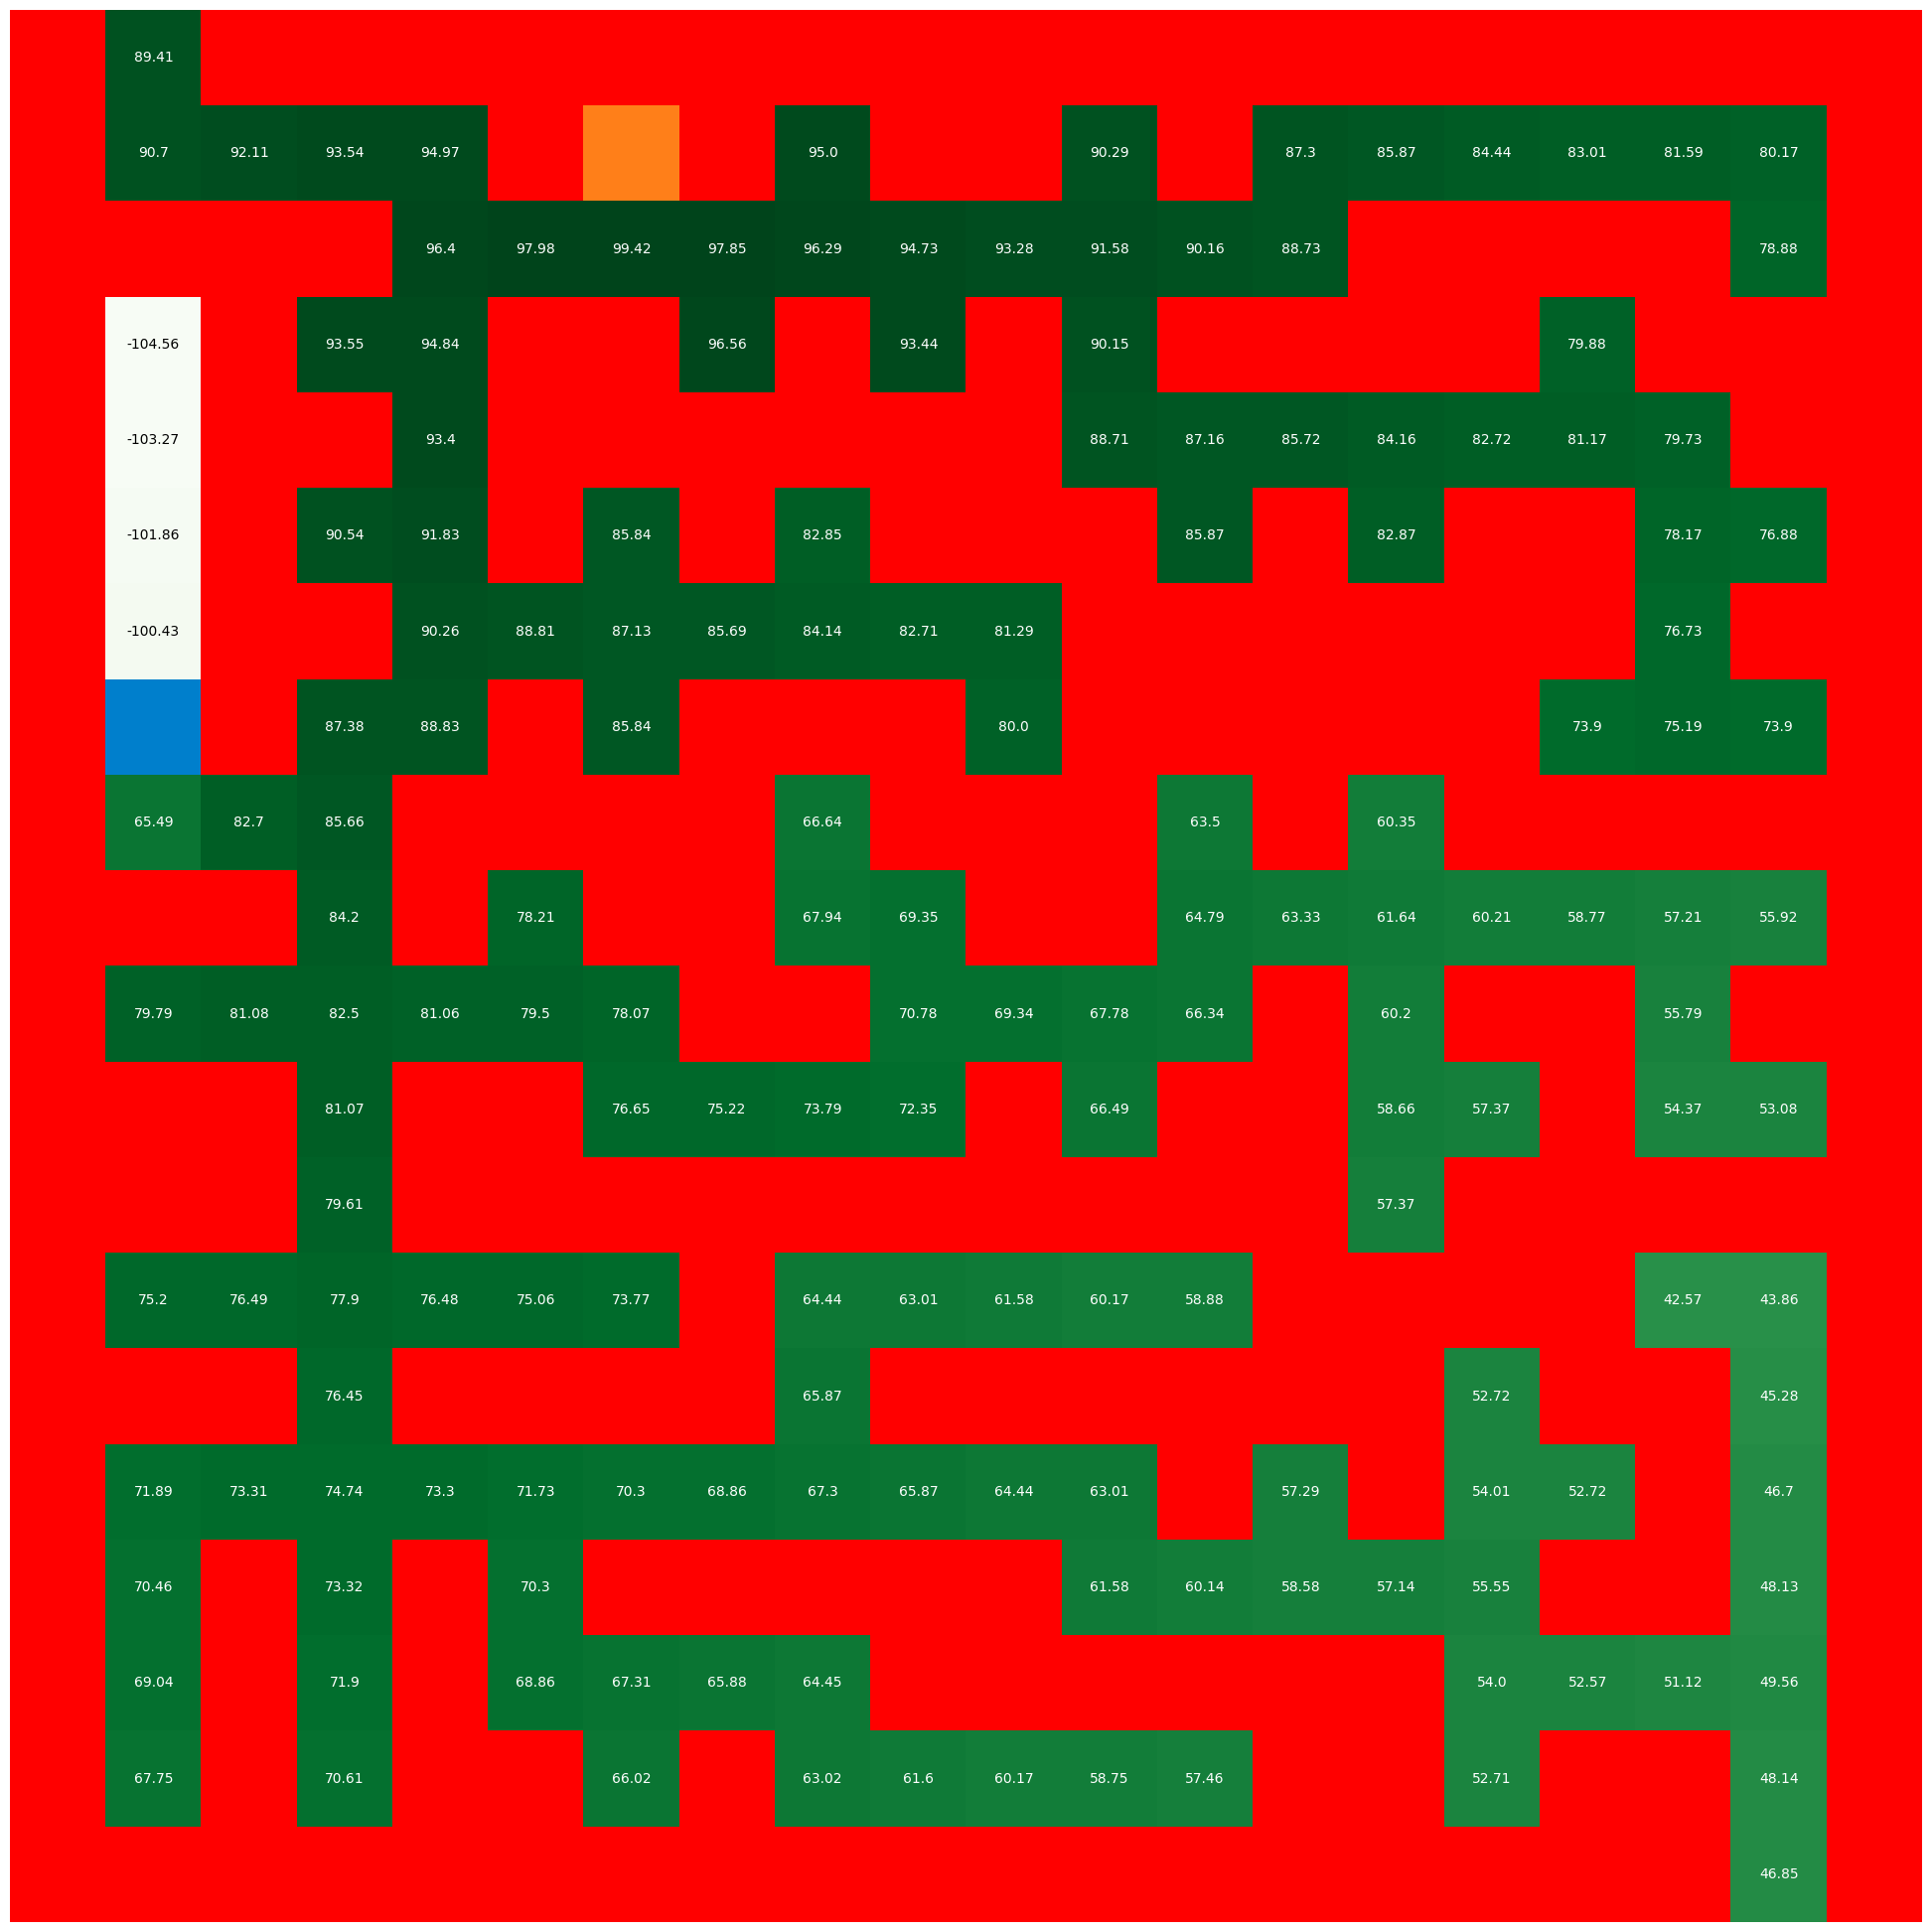

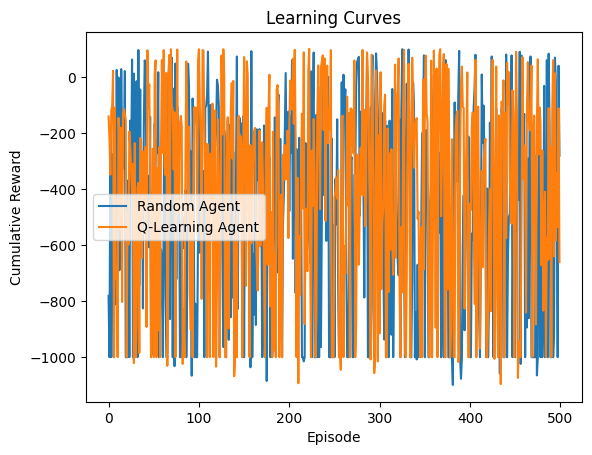

In [8]:
env = GridWorld()

# Initialize value and policy dictionaries
gamma = 1.0
theta = 1e-10
p_stoch = 0.7

v = np.zeros((20,20))

# Perform value iteration
v = iterate_values(env, v, gamma, theta, p_stoch)

agent = RandomAgent()
vAgent = ValueAgent(v)
qAgent = QLearningAgent(alpha=0.1, gamma=0.9, epsilon=0.1)
qAgent.initialize_q_table(env)

print("Current position of the agent =", env.current_location)
env.printMaze()

v = iterate_values(env, v, gamma, theta, p_stoch)

agent = RandomAgent()
vAgent = ValueAgent(v)
qAgent = QLearningAgent(alpha=0.1, gamma=0.9, epsilon=0.1)
qAgent.initialize_q_table(env)

print("Current position of the agent =", env.current_location)
env.printMaze()

print_v(v, env)

reward_per_episode = play(env, agent, trials=500)
reward_per_episode_q_learning = play(env, qAgent, trials=500, learn=True)

plt.plot(reward_per_episode, label="Random Agent")
plt.plot(reward_per_episode_q_learning, label="Q-Learning Agent")
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Learning Curves")
plt.show()


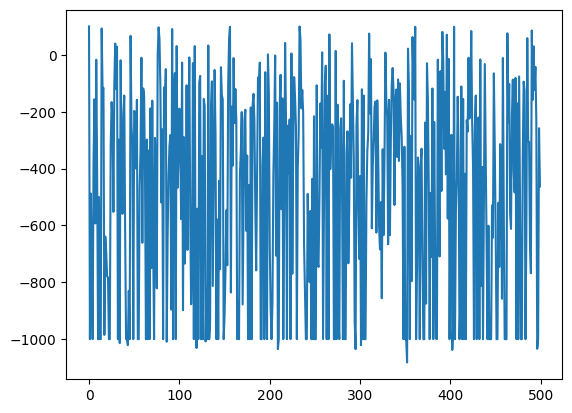

In [9]:
reward_per_episode = play(env, agent, trials=500)

# Simple learning curve
plt.plot(reward_per_episode)

        alpha=0.01   alpha=0.05   alpha=0.1   alpha=0.2    alpha=0.5
count   500.000000   500.000000   500.00000   500.00000   500.000000
mean   -415.630000  -457.416000  -432.36600  -459.34200  -560.166000
std     345.217554   361.569384   358.70022   359.39703   392.337068
min   -1097.000000 -1098.000000 -1096.00000 -1090.00000 -1074.000000
25%    -667.250000  -798.750000  -722.75000  -780.75000 -1000.000000
50%    -337.500000  -386.000000  -368.00000  -404.50000  -538.000000
75%    -137.250000  -140.000000  -132.50000  -173.75000  -198.750000
max     100.000000   100.000000   100.00000   100.00000   100.000000


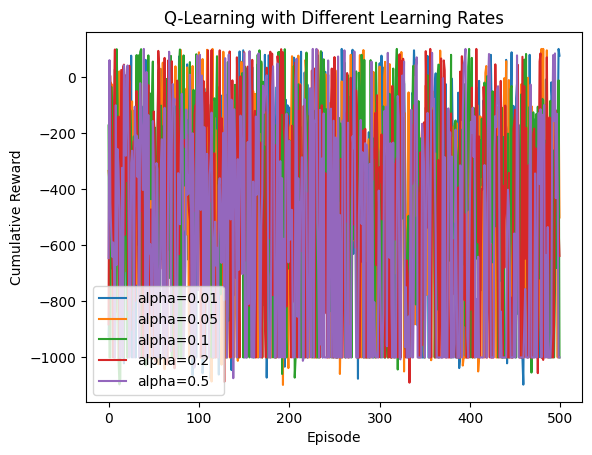

In [11]:
import pandas as pd

def experiment_with_alpha(alphas, env, gamma, epsilon, trials=500):
    results = {}
    for alpha in alphas:
        qAgent = QLearningAgent(alpha=alpha, gamma=gamma, epsilon=epsilon)
        qAgent.initialize_q_table(env)
        rewards = play(env, qAgent, trials=trials, learn=True)
        results[alpha] = rewards
    return results

alphas = [0.01, 0.05, 0.1, 0.2, 0.5]
results = experiment_with_alpha(alphas, env, gamma=0.9, epsilon=0.1)

data = {}
for alpha, rewards in results.items():
    data[f'alpha={alpha}'] = rewards

df = pd.DataFrame(data)
print(df.describe())

for alpha, rewards in results.items():
    plt.plot(rewards, label=f"alpha={alpha}")

plt.legend()
plt.xlabel("Episode")
plt.ylabel("Cumulative Reward")
plt.title("Q-Learning with Different Learning Rates")
plt.show()